### Surprise housing wants to enter the Australian market and they want to  data analytics to purchase houses at a price below their actual values and flip them at a higher price. 
### Our job is to help identify the important variables which contribute in the house prices and there values 
### Also we need to determine lambda for Ridge and Lasso regression 

In [1]:
## Importing the necessary libraries
import numpy as np
import pandas as pd
## Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Sklearn and its classes for performing actual regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import os
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
%matplotlib inline

### Please keep the train.csv file in the same folder as of this python notebook

In [3]:
## Reading the csv file in a dataframe
df = pd.read_csv('train.csv')

In [4]:
## Checking the head of the dataframe to confirm that the dataframe is correct
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
## Checking the number of rows and columns 
df.shape

(1460, 81)

In [6]:
## Checking the datatype of the various columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
## Percentage of Null values present for all the columns
round((df.isnull().sum()/df.shape[0])*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

### We will be removing the columns which have more than 30% NaN values as imputing them is not the correct way

In [8]:
df = df.dropna(thresh = len(df.index)*0.70, axis=1)

In [9]:
## Dropping ID column
df = df.drop(['Id'],axis = 1)

In [10]:
### Removed 5 columns with more than 30% missing
df.shape

(1460, 75)

### We have removed 5 columns having more than 30% missing values

In [11]:
# Removing rows with more than 50% NAN values (if any exists)
df = df.dropna(thresh = (df.shape[1])*0.50, axis = 0 )

In [12]:
## No row has more than 50% missing values
df.shape

(1460, 75)

### MSSubClass is a categorical column but given as numerical in the dataset so we need to make sure that the we impute the data and make necessary changes to convert it to categorical column

In [13]:
df['MSSubClass'] = df['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',
                                            40:'1-STORY W/FINISHED ATTIC ALL AGES',45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                            50:'1-1/2 STORY FINISHED ALL AGES',60:'2-STORY 1946 & NEWER',
                                            70:'2-STORY 1945 & OLDER',75:'2-1/2 STORY ALL AGES',80:'SPLIT OR MULTI-LEVEL',
                                            85:'SPLIT FOYER',90:'DUPLEX - ALL STYLES AND AGES',
                                            120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                            150:'1-1/2 STORY PUD - ALL AGES',160:'2-STORY PUD - 1946 & NEWER',
                                            180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                            190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

## Checking value counts for all the non integer and float variables

In [14]:
df_object = df.select_dtypes(include = 'object')
df_object.shape


(1460, 39)

In [15]:
df_object.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2-STORY 1946 & NEWER,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,2-STORY 1946 & NEWER,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,2-STORY 1945 & OLDER,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,2-STORY 1946 & NEWER,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [16]:
## Counting the various categories for all the categorical data
for c in df_object.columns:
    print("-- %s --" % c)
    print(df_object[c].value_counts())

-- MSSubClass --
1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: MSSubClass, dtype: int64
-- MSZoning --
RL         1151
RM    

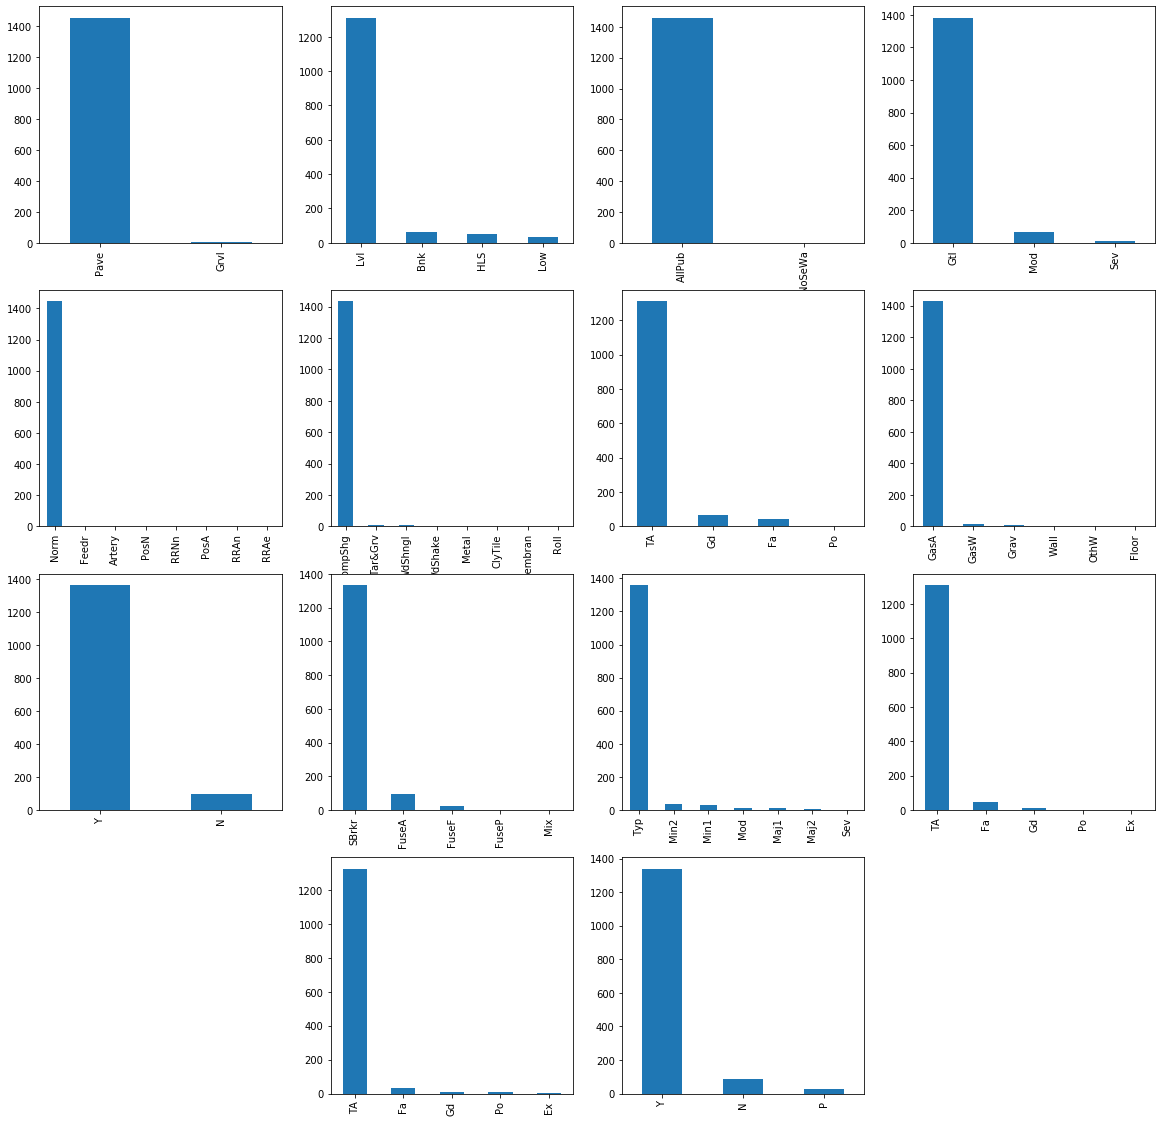

In [17]:
plt.figure(figsize = (20,20))
plt.subplot(4,4,1)
pd.value_counts(df['Street']).plot.bar()
plt.subplot(4,4,2)
pd.value_counts(df['LandContour']).plot.bar()
plt.subplot(4,4,3)
pd.value_counts(df['Utilities']).plot.bar()
plt.subplot(4,4,4)
pd.value_counts(df['LandSlope']).plot.bar()
plt.subplot(4,4,5)
pd.value_counts(df['Condition2']).plot.bar()
plt.subplot(4,4,6)
pd.value_counts(df['RoofMatl']).plot.bar()
plt.subplot(4,4,7)
pd.value_counts(df['BsmtCond']).plot.bar()
plt.subplot(4,4,8)
pd.value_counts(df['Heating']).plot.bar()
plt.subplot(4,4,9)
pd.value_counts(df['CentralAir']).plot.bar()
plt.subplot(4,4,10)
pd.value_counts(df['Electrical']).plot.bar()
plt.subplot(4,4,11)
pd.value_counts(df['Functional']).plot.bar()
plt.subplot(4,4,12)
pd.value_counts(df['GarageQual']).plot.bar()
plt.subplot(4,4,14)
pd.value_counts(df['GarageCond']).plot.bar()
plt.subplot(4,4,15)
pd.value_counts(df['PavedDrive']).plot.bar()

### Based on ~90% and more data imbalance dropping the following columns from the dataframe :
- Street
- LandContour
- Utlities
- LandSlope
- Condition2
- RoofMatl
- BsmtCond
- Heating
- CentralAir
- Electrical
- Functional
- GarageQual 
- GarageCond 
- PavedDrive


In [18]:
df = df.drop(['Street','LandContour','Utilities','LandSlope','Condition2','RoofMatl','BsmtCond','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive'],axis = 1)

In [19]:
df.shape

(1460, 61)

In [20]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [21]:
df_object = df.select_dtypes(include = object)
df_object.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,...,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleType,SaleCondition
0,2-STORY 1946 & NEWER,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,...,Gd,No,GLQ,Unf,Ex,Gd,Attchd,RFn,WD,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,Reg,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,...,Gd,Gd,ALQ,Unf,Ex,TA,Attchd,RFn,WD,Normal
2,2-STORY 1946 & NEWER,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,...,Gd,Mn,GLQ,Unf,Ex,Gd,Attchd,RFn,WD,Normal
3,2-STORY 1945 & OLDER,RL,IR1,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,...,TA,No,ALQ,Unf,Gd,Gd,Detchd,Unf,WD,Abnorml
4,2-STORY 1946 & NEWER,RL,IR1,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,...,Gd,Av,GLQ,Unf,Ex,Gd,Attchd,RFn,WD,Normal


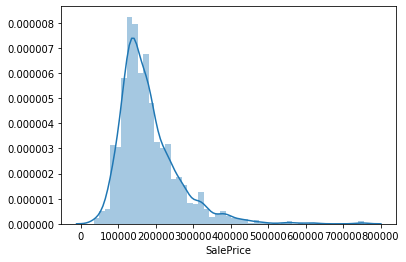

In [22]:
sns.distplot(df['SalePrice'])
plt.show()

### The sale price is a normal distribution as can be seen from the distplot 

In [23]:
## Creating a dataframe with only numerical columns
df_int = df.select_dtypes(['int32','int64','float32','float64'])



In [24]:
corr = df_int.corr()
corr

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479


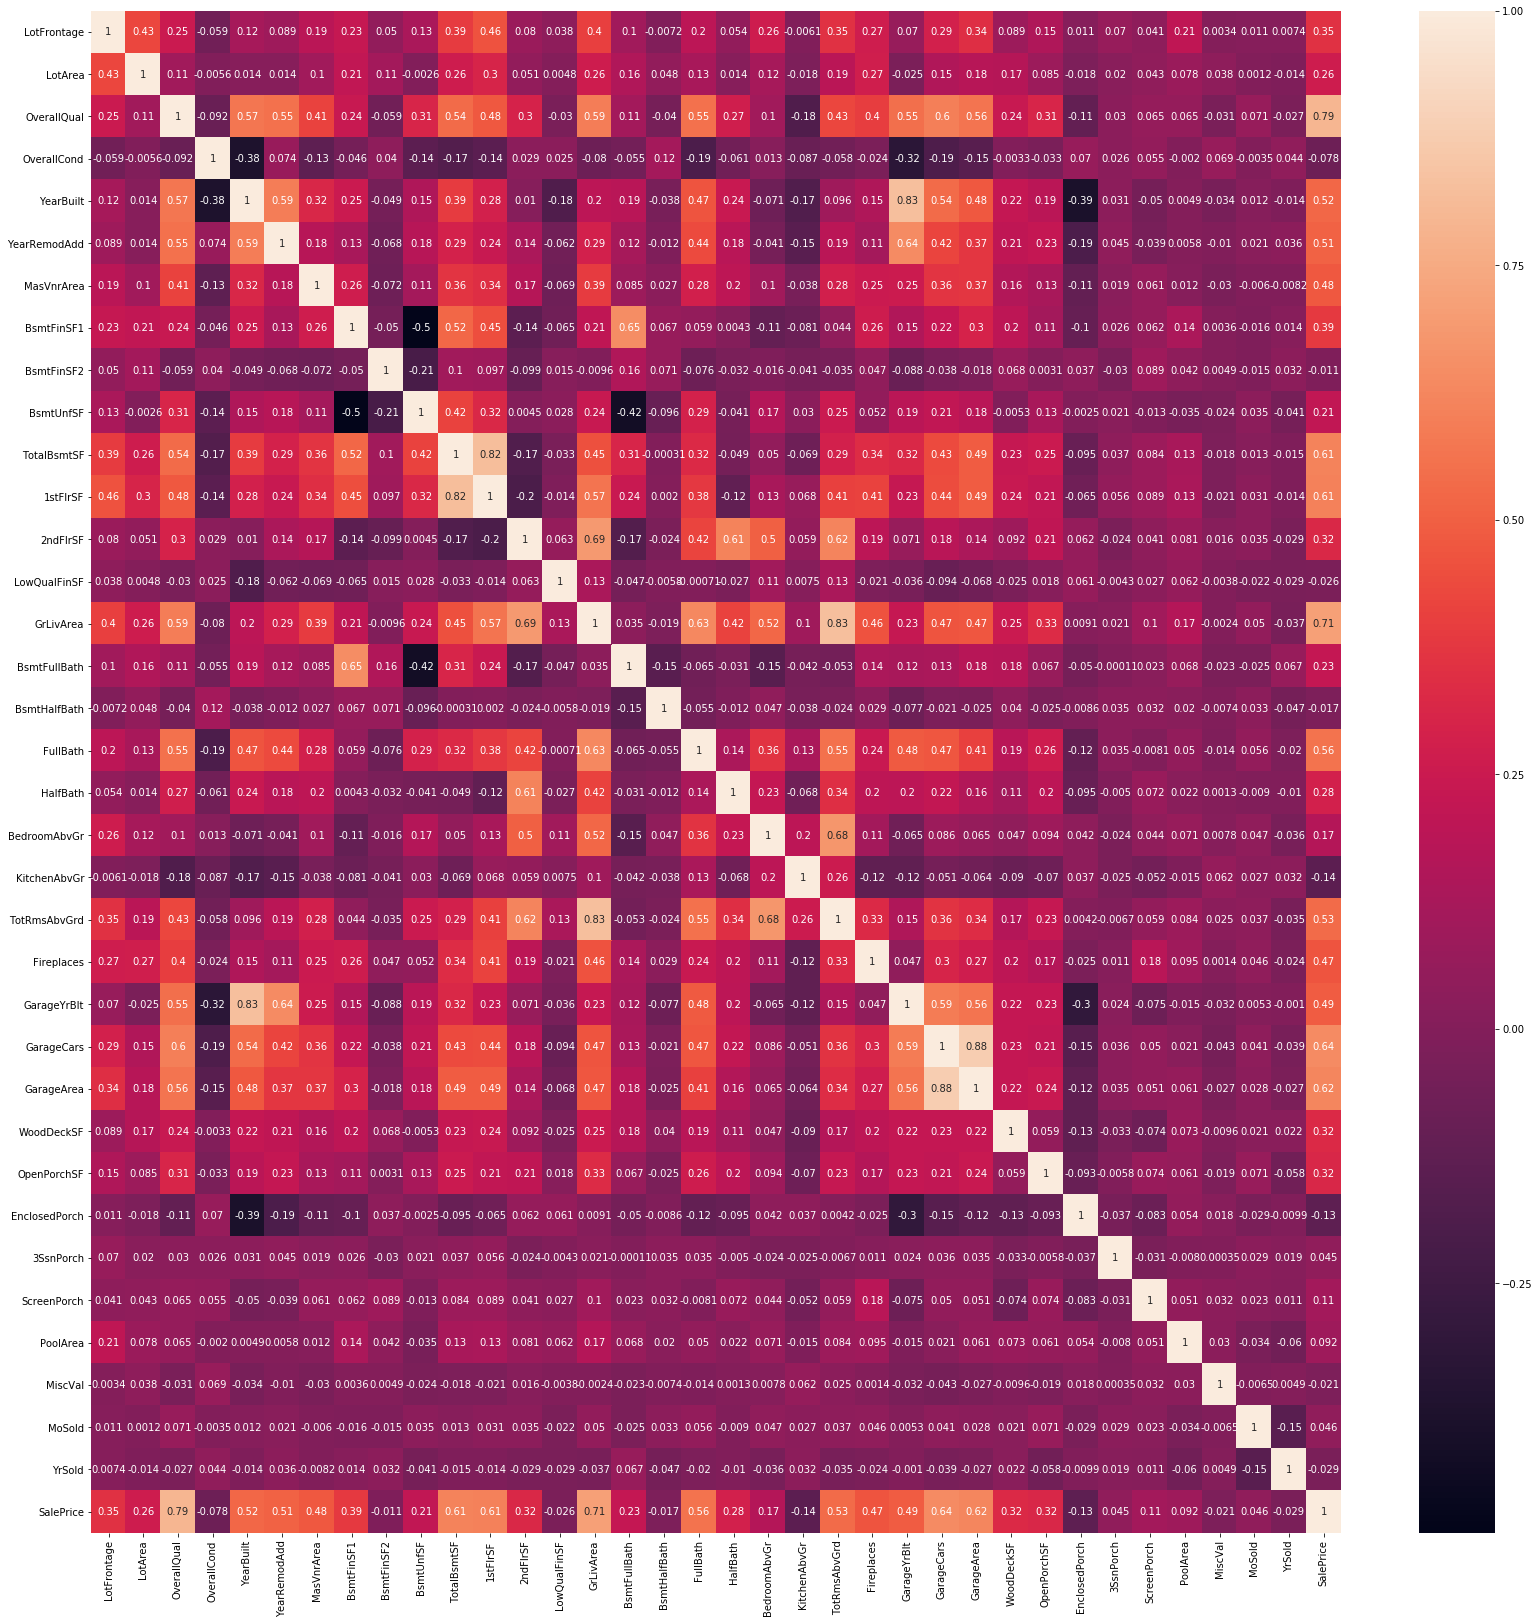

In [25]:
%matplotlib inline
plt.figure(figsize = (28,28))
sns.heatmap(corr,annot = True)
plt.show()

## Checking and handling outliers

In [26]:

df_int.describe([0.01,0.05,0.25,0.50,0.75,0.95,0.99])

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
1%,21.000000,1680.000000,3.000000,3.000000,1899.180000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,61815.970000
5%,34.000000,3311.700000,4.000000,4.000000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,88000.000000
25%,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
95%,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000


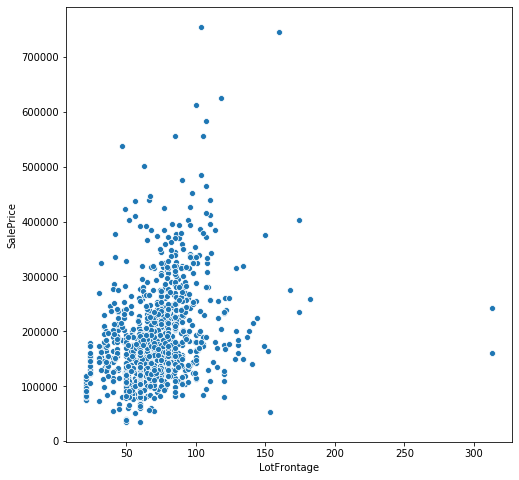

In [27]:
%matplotlib inline
plt.figure(figsize = (8,8))
sns.scatterplot(x = df_int['LotFrontage'],y=df_int['SalePrice'],data = df_int)
plt.show()

In [28]:
df_int_outlier = df_int[(df_int['SalePrice'] < 61815) | (df_int['SalePrice'] > 442567 )]

### Handling NAN for categorical columns 

In [29]:
df_object.isna().sum()

MSSubClass        0
MSZoning          0
LotShape          0
LotConfig         0
Neighborhood      0
Condition1        0
BldgType          0
HouseStyle        0
RoofStyle         0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
HeatingQC         0
KitchenQual       0
GarageType       81
GarageFinish     81
SaleType          0
SaleCondition     0
dtype: int64

### From data dictionary we know that for GarageType, Finish, Qual and Cond `NA` means that there's `No Garage` hence we will replace NA with No Garage

### Also we know that in case of `no basement` the following columns are having NA : BsmtQual, BsmtExposure,
### BsmtCond, BsmtFinType1, BsmtFinType2

In [30]:
df_object[['GarageType','GarageFinish']] = df_object[['GarageType','GarageFinish']].fillna('No Garage')

df_object[['BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = df_object[['BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('No Basement') 


In [31]:
## Verifying the above operation was successful 
df_object.isna().sum()

MSSubClass       0
MSZoning         0
LotShape         0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
HeatingQC        0
KitchenQual      0
GarageType       0
GarageFinish     0
SaleType         0
SaleCondition    0
dtype: int64

### We have 1 more column with NaN and we will impute them with the mode of the data

In [32]:
df_object['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [33]:
df_object[['MasVnrType']] = df_object[['MasVnrType']].fillna('None')

### Checking and handling NAN for numerical columns 

In [34]:
df_int.isnull().sum()

LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [35]:
df_int['LotFrontage'].mode()

0    60.0
dtype: float64

In [36]:
## Replacing the na with mode
df_int[['LotFrontage']] = df_int[['LotFrontage']].fillna(60)

In [37]:
df_int['MasVnrArea'].mode()

0    0.0
dtype: float64

In [38]:
### Replacing with Mode
df_int[['GarageYrBlt']] = df_int[['GarageYrBlt']].fillna(2005)

In [39]:
df_int[['MasVnrArea']] = df_int[['MasVnrArea']].fillna(0)

In [40]:
df_int.isnull().sum()

LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [41]:
df_int.describe([0.05,0.25,0.50,0.75,0.95,0.99])

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,68.267123,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,22.356355,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
5%,35.950000,3311.700000,4.000000,4.000000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,88000.000000
25%,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
95%,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,830.380000,1797.050000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


In [42]:
df_int[(df['SalePrice'] > 442567.010000) | (df['SalePrice'] < 88000.000000) ]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
29,60.0,6324,4,6,1927,1950,0.0,0,0,520,...,49,0,87,0,0,0,0,5,2008,68500
30,50.0,8500,4,4,1920,1950,0.0,0,0,649,...,0,54,172,0,0,0,0,7,2008,40000
39,65.0,6040,4,5,1955,1955,0.0,0,0,0,...,0,0,0,0,0,0,0,6,2008,82000
68,47.0,4608,4,6,1945,1950,0.0,0,0,747,...,0,0,0,0,0,0,0,6,2010,80000
88,105.0,8470,3,2,1915,1982,0.0,0,0,1013,...,0,0,156,0,0,0,0,10,2009,85000
98,85.0,10625,5,5,1920,1950,0.0,108,0,350,...,0,0,77,0,0,0,400,5,2010,83000
125,60.0,6780,6,8,1935,1982,0.0,490,0,30,...,53,0,0,0,0,0,0,6,2006,84500
127,55.0,4388,5,7,1930,1950,0.0,116,0,556,...,0,0,0,0,0,0,0,6,2007,87000
155,60.0,9600,6,5,1924,1950,0.0,0,0,572,...,0,8,128,0,0,0,0,4,2008,79000
178,63.0,17423,9,5,2008,2009,748.0,1904,0,312,...,0,60,0,0,0,0,0,7,2009,501837


### We will not be dropping the outlier as it will be a lot of data loss 

## Encoding the categorical variables in the datasets

In [43]:
df_encoded = df_object
df_encoded.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,...,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleType,SaleCondition
0,2-STORY 1946 & NEWER,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,...,Gd,No,GLQ,Unf,Ex,Gd,Attchd,RFn,WD,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,Reg,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,...,Gd,Gd,ALQ,Unf,Ex,TA,Attchd,RFn,WD,Normal
2,2-STORY 1946 & NEWER,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,...,Gd,Mn,GLQ,Unf,Ex,Gd,Attchd,RFn,WD,Normal
3,2-STORY 1945 & OLDER,RL,IR1,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,...,TA,No,ALQ,Unf,Gd,Gd,Detchd,Unf,WD,Abnorml
4,2-STORY 1946 & NEWER,RL,IR1,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,...,Gd,Av,GLQ,Unf,Ex,Gd,Attchd,RFn,WD,Normal


In [44]:
# Filter categorical columns using mask and turn it into a list
categorical_cols = df_encoded.columns.tolist()

In [45]:
df_encoded = pd.get_dummies(df_encoded,drop_first=True)
df_encoded.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [46]:
df_final = pd.concat([df_int,df_encoded],axis =  1)

In [47]:
df_final.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [48]:
df2 = df_final

In [49]:
df_numerics = df_final.select_dtypes(include = ('int64','float64'))
df_numerics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 36 columns):
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageYrBlt      1460 non-null float64

In [50]:
df3 = df2

## Data preparation

In [51]:
## Train - test split
# split into train and test
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df_final,train_size=0.70,test_size = 0.30, random_state=100)

In [52]:
print(df_train.shape)
print(df_test.shape)

(1021, 202)
(438, 202)


## Feature Scaling

### Scaling using MinMax Scaler

In [53]:
df_numerics = df_train.select_dtypes(include = ['int64','float64'])
df_numerics.shape

(1021, 36)

In [54]:
cols = df_numerics.columns

In [55]:
## Importing MinMaxScaler and transforming the train dataframe

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[cols] = scaler.fit_transform(df_train[cols])

In [56]:
## Transforming test data
df_test[cols] = scaler.fit_transform(df_test[cols])

In [57]:
## Verifying whether the data has been scaled properly
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.160905,0.042143,0.565676,0.572723,0.719215,0.582305,0.065306,0.079337,0.033980,0.241388,...,0.002938,0.003918,0.078355,0.002938,0.870715,0.002938,0.007835,0.013712,0.825661,0.078355
std,0.076641,0.048226,0.155529,0.136506,0.219897,0.343843,0.117088,0.082377,0.115907,0.192066,...,0.054153,0.062500,0.268860,0.054153,0.335680,0.054153,0.088214,0.116350,0.379587,0.268860
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.027923,0.444444,0.500000,0.594203,0.283333,0.000000,0.000000,0.000000,0.092466,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.133562,0.037531,0.555556,0.500000,0.731884,0.733333,0.000000,0.069454,0.000000,0.197774,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.195205,0.046943,0.666667,0.625000,0.927536,0.900000,0.098750,0.126152,0.000000,0.345034,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,...,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,0.163946,0.058914,0.568493,0.508806,0.718275,0.577816,0.108744,0.197913,0.034080,0.297560,...,0.004566,0.002283,0.095890,0.0,0.860731,0.002283,0.009132,0.013699,0.808219,0.102740
std,0.076415,0.058305,0.149493,0.165969,0.223232,0.345295,0.178732,0.198918,0.121192,0.220282,...,0.067496,0.047782,0.294778,0.0,0.346623,0.047782,0.095235,0.116370,0.394152,0.303966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.040913,0.444444,0.428571,0.589552,0.266667,0.000000,0.000000,0.000000,0.131525,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.150685,0.051284,0.555556,0.428571,0.723881,0.716667,0.000000,0.164762,0.000000,0.258656,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.202055,0.065948,0.666667,0.571429,0.940299,0.900000,0.188925,0.324383,0.000000,0.418346,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
y_train = df_train['SalePrice']
df_train = df_train.drop(['SalePrice'],axis =1 )

In [60]:
X_train = df_train
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.157534,0.019306,0.444444,0.625,0.384058,0.000000,0.00,0.082920,0.0,0.169521,...,0,0,0,0,1,0,0,0,1,0
318,0.236301,0.039403,0.666667,0.500,0.876812,0.716667,0.16,0.174876,0.0,0.154110,...,0,0,0,0,1,0,0,0,1,0
239,0.106164,0.033981,0.555556,0.375,0.528986,0.000000,0.00,0.016655,0.0,0.274401,...,0,0,0,0,1,0,0,0,1,0
986,0.130137,0.017931,0.555556,0.875,0.275362,0.883333,0.00,0.000000,0.0,0.207620,...,0,0,0,0,1,0,0,0,1,0
1416,0.133562,0.046139,0.333333,0.625,0.094203,0.000000,0.00,0.000000,0.0,0.332620,...,0,0,0,0,1,0,0,0,1,0


In [61]:
y_test = df_test['SalePrice']
df_test = df_test.drop(['SalePrice'],axis = 1)

In [62]:
X_test = df_test
X_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.133562,0.048827,0.333333,0.571429,0.716418,0.350000,0.00000,0.281536,0.0,0.128165,...,0,0,0,0,1,0,0,0,1,0
57,0.232877,0.065599,0.666667,0.428571,0.962687,0.900000,0.00000,0.000000,0.0,0.444444,...,0,0,0,0,1,0,0,0,1,0
780,0.143836,0.041693,0.666667,0.428571,0.895522,0.766667,0.04126,0.000000,0.0,0.639276,...,0,0,0,0,1,0,0,0,1,0
382,0.198630,0.050380,0.666667,0.428571,0.977612,0.933333,0.00000,0.000000,0.0,0.485271,...,0,0,0,0,1,0,0,0,1,0
1170,0.188356,0.054407,0.555556,0.571429,0.761194,0.450000,0.00000,0.238574,0.0,0.296641,...,0,0,0,0,1,0,0,0,1,0


In [63]:
y_test_main = y_test

## Linear Regression

In [64]:
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.8956444429419196

In [65]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-3.3777147717533764e+21

In [66]:
from sklearn.feature_selection import RFE
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, 40))}]

# specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 5 folds for each of 38 candidates, totalling 190 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 190 out of 190 | elapsed:  4.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='warn', n_jobs=None,
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23, 24,
                                                   25, 26, 27, 28, 29, 30, 31, ...]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [67]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.319674,0.046495,0.001795,3.986366e-04,2,{'n_features_to_select': 2},0.646911,0.581546,0.764459,0.724934,...,0.682887,0.063506,32,0.703373,0.726522,0.671919,0.700112,0.689470,0.698279,0.017885
1,1.406044,0.095105,0.001995,6.315053e-04,3,{'n_features_to_select': 3},0.641329,0.598745,0.779253,0.742720,...,0.705632,0.072175,30,0.718474,0.737004,0.680597,0.725928,0.723787,0.717158,0.019252
2,1.343411,0.035464,0.001995,4.101908e-07,4,{'n_features_to_select': 4},0.546308,0.584615,0.779284,0.668604,...,0.663355,0.088372,35,0.728814,0.742506,0.680631,0.738741,0.727871,0.723713,0.022264
3,1.498596,0.135236,0.001795,3.981876e-04,5,{'n_features_to_select': 5},0.514895,0.583078,0.775732,0.665774,...,0.652166,0.093807,38,0.743475,0.742775,0.714921,0.746494,0.731748,0.735883,0.011612
4,1.453517,0.033232,0.001596,4.888507e-04,6,{'n_features_to_select': 6},0.497437,0.585200,0.781174,0.682239,...,0.653338,0.100824,37,0.745271,0.742929,0.737545,0.764293,0.732544,0.744516,0.010827


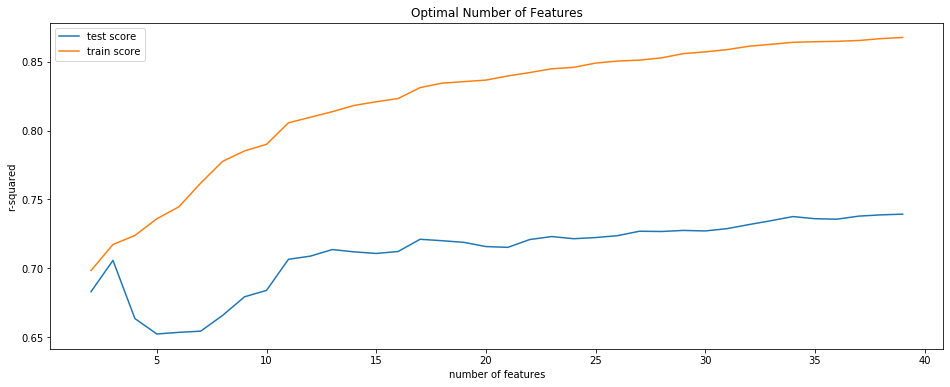

In [68]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [69]:
# final model
n_features_optimal = 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

-3.3777147717533764e+21


### As can be seen the R2 score is negative hence we will not be using Linear Regression Model for our analysis rather we will check the model performance using Ridge and Lasso Regression

# Multiple Linear Regression

In [70]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [71]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 6),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 122),
 ('MasVnrArea', False, 37),
 ('BsmtFinSF1', False, 21),
 ('BsmtFinSF2', False, 20),
 ('BsmtUnfSF', False, 27),
 ('TotalBsmtSF', False, 26),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 28),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 79),
 ('FullBath', False, 39),
 ('HalfBath', False, 146),
 ('BedroomAbvGr', False, 67),
 ('KitchenAbvGr', False, 43),
 ('TotRmsAbvGrd', False, 85),
 ('Fireplaces', False, 82),
 ('GarageYrBlt', False, 152),
 ('GarageCars', True, 1),
 ('GarageArea', False, 9),
 ('WoodDeckSF', False, 55),
 ('OpenPorchSF', False, 120),
 ('EnclosedPorch', False, 88),
 ('3SsnPorch', False, 33),
 ('ScreenPorch', False, 70),
 ('PoolArea', False, 140),
 ('MiscVal', False, 123),
 ('MoSold', False, 138),
 ('YrSold', False, 135),
 ('MSSubClass_1-1/2 STORY FINISHED A

In [72]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'GarageCars', 'LotShape_IR3',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'HouseStyle_1Story', 'Exterior1st_ImStucc',
       'Exterior2nd_ImStucc', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_TA',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_No Basement', 'BsmtQual_TA',
       'BsmtExposure_Gd', 'BsmtFinType1_No Basement', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'SaleType_Con'],
      dtype='object')

In [73]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'BsmtHalfBath', 'FullBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=171)

In [74]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

## Printing the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     194.9
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:30:01   Log-Likelihood:                 1778.2
No. Observations:                1021   AIC:                            -3496.
Df Residuals:                     991   BIC:                            -3349.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [75]:
X_train_new = X_train_rfe

In [76]:
## Dropping columns with p-value more than 0.05
X_train_new = X_train_new.drop(["GrLivArea"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     201.9
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:30:01   Log-Likelihood:                 1777.8
No. Observations:                1021   AIC:                            -3498.
Df Residuals:                     992   BIC:                            -3355.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [77]:
## Dropping columns with p-value more than 0.05
X_train_new = X_train_new.drop(["ExterCond_Fa"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     209.2
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:30:01   Log-Likelihood:                 1777.0
No. Observations:                1021   AIC:                            -3498.
Df Residuals:                     993   BIC:                            -3360.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [78]:
## Dropping columns with p-value more than 0.05
X_train_new = X_train_new.drop(["ExterCond_TA"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:30:01   Log-Likelihood:                 1776.5
No. Observations:                1021   AIC:                            -3499.
Df Residuals:                     994   BIC:                            -3366.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [79]:
## Dropping columns with p-value more than 0.05
X_train_new = X_train_new.drop(["ExterCond_Gd"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     226.0
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:30:01   Log-Likelihood:                 1776.4
No. Observations:                1021   AIC:                            -3501.
Df Residuals:                     995   BIC:                            -3373.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [80]:
## Dropping columns with p-value more than 0.05
X_train_new = X_train_new.drop(["Exterior1st_ImStucc"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     235.0
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:30:01   Log-Likelihood:                 1775.1
No. Observations:                1021   AIC:                            -3500.
Df Residuals:                     996   BIC:                            -3377.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [81]:
## Dropping columns with p-value more than 0.05
X_train_new = X_train_new.drop(["Exterior2nd_ImStucc"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     245.0
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:30:01   Log-Likelihood:                 1774.3
No. Observations:                1021   AIC:                            -3501.
Df Residuals:                     997   BIC:                            -3382.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [82]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [83]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,BsmtFinType1_No Basement,inf
16,BsmtQual_No Basement,inf
1,OverallQual,41.34
3,YearBuilt,28.92
2,OverallCond,19.29
7,GarageCars,12.12
22,KitchenQual_TA,12.03
4,1stFlrSF,10.78
17,BsmtQual_TA,10.61
21,KitchenQual_Gd,9.23


In [84]:
## Dropping high VIF columns 

X_train_new = X_train_new.drop(['BsmtFinType1_No Basement'],axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,OverallQual,41.34
3,YearBuilt,28.92
2,OverallCond,19.29
7,GarageCars,12.12
21,KitchenQual_TA,12.03
4,1stFlrSF,10.78
17,BsmtQual_TA,10.61
20,KitchenQual_Gd,9.23
15,BsmtQual_Gd,8.14
13,HouseStyle_1Story,6.05


In [85]:
## Dropping high VIF columns 

X_train_new = X_train_new.drop(['OverallQual'],axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,YearBuilt,21.43
1,OverallCond,16.50
20,KitchenQual_TA,12.00
6,GarageCars,11.77
16,BsmtQual_TA,10.61
19,KitchenQual_Gd,9.23
3,1stFlrSF,9.14
14,BsmtQual_Gd,8.14
12,HouseStyle_1Story,6.04
4,2ndFlrSF,4.78


In [86]:
## Dropping high VIF columns 

X_train_new = X_train_new.drop(['YearBuilt'],axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,OverallCond,16.19
19,KitchenQual_TA,11.08
15,BsmtQual_TA,10.54
5,GarageCars,10.10
2,1stFlrSF,8.92
18,KitchenQual_Gd,8.44
13,BsmtQual_Gd,7.82
11,HouseStyle_1Story,5.65
3,2ndFlrSF,4.58
0,LotArea,2.32


In [87]:
## Dropping high VIF columns 

X_train_new = X_train_new.drop(['OverallCond'],axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,KitchenQual_TA,10.48
4,GarageCars,9.90
14,BsmtQual_TA,8.72
1,1stFlrSF,8.71
17,KitchenQual_Gd,7.93
12,BsmtQual_Gd,7.21
10,HouseStyle_1Story,5.60
2,2ndFlrSF,4.39
0,LotArea,2.32
3,BsmtFullBath,1.98


In [88]:
## Dropping high VIF columns 

X_train_new = X_train_new.drop(['KitchenQual_TA'],axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,GarageCars,9.64
1,1stFlrSF,8.68
10,HouseStyle_1Story,5.41
2,2ndFlrSF,4.29
12,BsmtQual_Gd,3.77
14,BsmtQual_TA,3.20
0,LotArea,2.32
17,KitchenQual_Gd,2.32
3,BsmtFullBath,1.98
15,BsmtExposure_Gd,1.40


In [89]:
## Dropping high VIF columns 

X_train_new = X_train_new.drop(['GarageCars'],axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,1stFlrSF,7.18
9,HouseStyle_1Story,5.19
2,2ndFlrSF,3.69
11,BsmtQual_Gd,3.44
13,BsmtQual_TA,3.10
0,LotArea,2.32
16,KitchenQual_Gd,2.26
3,BsmtFullBath,1.97
14,BsmtExposure_Gd,1.39
7,Neighborhood_NridgHt,1.30


In [90]:
## Dropping high VIF columns 

X_train_new = X_train_new.drop(['1stFlrSF'],axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,HouseStyle_1Story,3.80
1,2ndFlrSF,3.35
10,BsmtQual_Gd,3.35
12,BsmtQual_TA,2.99
15,KitchenQual_Gd,2.24
0,LotArea,2.17
2,BsmtFullBath,1.93
13,BsmtExposure_Gd,1.32
6,Neighborhood_NridgHt,1.22
5,Neighborhood_NoRidge,1.21


In [91]:
X_train_new = sm.add_constant(X_train_new)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     142.0
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          1.10e-252
Time:                        14:30:02   Log-Likelihood:                 1432.7
No. Observations:                1021   AIC:                            -2829.
Df Residuals:                    1003   BIC:                            -2741.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2240 

In [92]:
X_train_new = X_train_new.drop(['SaleType_Con'],axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     150.3
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          4.22e-253
Time:                        14:30:02   Log-Likelihood:                 1431.1
No. Observations:                1021   AIC:                            -2828.
Df Residuals:                    1004   BIC:                            -2744.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2235 

In [93]:
X_train_new.columns

Index(['const', 'LotArea', '2ndFlrSF', 'BsmtFullBath', 'LotShape_IR3',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'HouseStyle_1Story', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_No Basement', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'KitchenQual_Fa', 'KitchenQual_Gd'],
      dtype='object')

In [94]:
y_train_price = lm.predict(X_train_lm)
y_train_price.shape

(1021,)

Text(0.5, 0, 'Errors')

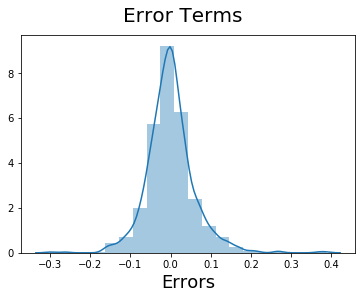

In [95]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [96]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop(['const'],axis = 1)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


In [97]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

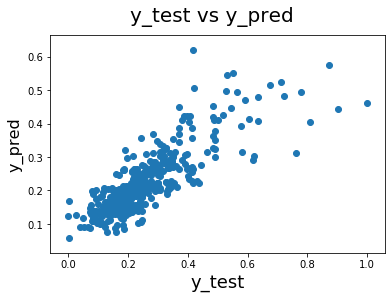

In [98]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test_main,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [99]:
## Checking the R2 score for the final model
metrics.r2_score(y_test_main,y_pred)

0.6110914458095325

## As can be observed that the test R2 score for model fitted using multiple linear regression is very less and deviates by about 10% from train R2 score ,which indicates that we need to perform some regularization so as to build a good model 

# Ridge regression

### We will start with Ridge(L2) regularization first and used GridSearchCV to perform the ridge estimates with 5 fold cross validation

In [100]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5

## Using GridSearchCV to perform ridge regression with 5 fold cross validation
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [101]:
## Making a dataframe with model results obtained 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.tail(15)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
13,0.012564,0.004019,0.003397,0.001499,1,{'alpha': 1.0},-0.025978,-0.028987,-0.030297,-0.024707,...,-0.027737,0.002067,11,-0.022468,-0.018573,-0.020851,-0.022731,-0.022302,-0.021385,0.001550
14,0.011968,0.002601,0.003193,0.002035,2,{'alpha': 2.0},-0.024571,-0.028755,-0.030006,-0.024028,...,-0.027079,0.002363,9,-0.022598,-0.018987,-0.020864,-0.022778,-0.022365,-0.021518,0.001436
15,0.015758,0.002130,0.004193,0.001167,3,{'alpha': 3.0},-0.023758,-0.028697,-0.029706,-0.023739,...,-0.026709,0.002505,8,-0.022754,-0.019388,-0.020936,-0.022864,-0.022466,-0.021681,0.001340
16,0.011168,0.003535,0.002593,0.000489,4,{'alpha': 4.0},-0.023272,-0.028719,-0.029448,-0.023546,...,-0.026481,0.002594,7,-0.022942,-0.019726,-0.021076,-0.022992,-0.022617,-0.021871,0.001280
17,0.008777,0.000746,0.002194,0.000746,5,{'alpha': 5.0},-0.022994,-0.028797,-0.029326,-0.023420,...,-0.026362,0.002668,5,-0.023121,-0.020039,-0.021240,-0.023131,-0.022782,-0.022063,0.001229
18,0.015758,0.007008,0.002393,0.000489,6,{'alpha': 6.0},-0.022840,-0.028892,-0.029266,-0.023350,...,-0.026318,0.002725,3,-0.023296,-0.020327,-0.021396,-0.023270,-0.022943,-0.022247,0.001187
19,0.009975,0.000628,0.002392,0.000490,7,{'alpha': 7.0},-0.022743,-0.028983,-0.029198,-0.023331,...,-0.026301,0.002758,1,-0.023465,-0.020599,-0.021577,-0.023409,-0.023097,-0.022430,0.001145
20,0.022739,0.010620,0.004789,0.002130,8,{'alpha': 8.0},-0.022675,-0.029069,-0.029143,-0.023369,...,-0.026312,0.002777,2,-0.023620,-0.020858,-0.021748,-0.023547,-0.023246,-0.022604,0.001106
21,0.013767,0.003958,0.002390,0.000485,9,{'alpha': 9.0},-0.022626,-0.029166,-0.029122,-0.023436,...,-0.026343,0.002796,4,-0.023764,-0.021093,-0.021921,-0.023699,-0.023394,-0.022774,0.001074
22,0.010968,0.002601,0.002195,0.000398,10,{'alpha': 10.0},-0.022622,-0.029261,-0.029126,-0.023507,...,-0.026391,0.002808,6,-0.023906,-0.021321,-0.022092,-0.023845,-0.023537,-0.022940,0.001044


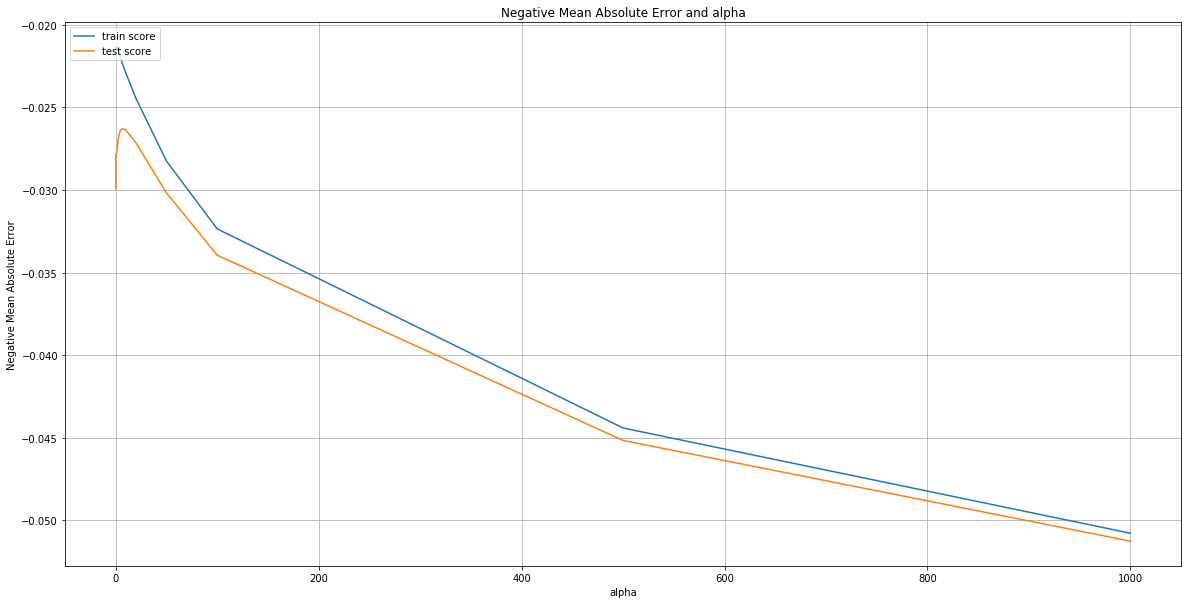

In [102]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

%matplotlib inline
# plotting
plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.grid()
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Based on the graph and table above we choose alpha(lambda) = 2 for ridge regression

In [103]:

alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.02741332,  0.05545831,  0.10200226,  0.04565128,  0.01334606,
        0.00954926,  0.03318142,  0.01349904,  0.01363151,  0.01995574,
        0.02338757,  0.06457508,  0.10777208, -0.01005632,  0.09537561,
        0.03579379,  0.00823014,  0.04113405,  0.01261402, -0.00185369,
       -0.02638498,  0.03209261,  0.02264444, -0.00089338,  0.05529019,
        0.01724225,  0.02130065, -0.00287548,  0.00554886,  0.0244837 ,
        0.01029676,  0.00482864, -0.00202073, -0.00245189, -0.00507146,
        0.00977148,  0.00179609,  0.00689577, -0.015953  ,  0.00732345,
       -0.0078002 ,  0.01211347,  0.00455019, -0.00097538, -0.0133923 ,
       -0.00529933, -0.00418445, -0.00033585,  0.00613364,  0.00952639,
        0.01407718,  0.01582081,  0.01358557,  0.00539963, -0.02175578,
        0.00211866,  0.01455012, -0.018878  , -0.01146794, -0.00246137,
       -0.00482823, -0.00474312, -0.0054893 ,  0.00262697, -0.00427763,
        0.03063567, -0.03225055, -0.00545367, -0.01910272, -0.01

In [104]:
# lasso model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.021),
 ('LotFrontage', -0.027),
 ('LotArea', 0.055),
 ('OverallQual', 0.102),
 ('OverallCond', 0.046),
 ('YearBuilt', 0.013),
 ('YearRemodAdd', 0.01),
 ('MasVnrArea', 0.033),
 ('BsmtFinSF1', 0.013),
 ('BsmtFinSF2', 0.014),
 ('BsmtUnfSF', 0.02),
 ('TotalBsmtSF', 0.023),
 ('1stFlrSF', 0.065),
 ('2ndFlrSF', 0.108),
 ('LowQualFinSF', -0.01),
 ('GrLivArea', 0.095),
 ('BsmtFullBath', 0.036),
 ('BsmtHalfBath', 0.008),
 ('FullBath', 0.041),
 ('HalfBath', 0.013),
 ('BedroomAbvGr', -0.002),
 ('KitchenAbvGr', -0.026),
 ('TotRmsAbvGrd', 0.032),
 ('Fireplaces', 0.023),
 ('GarageYrBlt', -0.001),
 ('GarageCars', 0.055),
 ('GarageArea', 0.017),
 ('WoodDeckSF', 0.021),
 ('OpenPorchSF', -0.003),
 ('EnclosedPorch', 0.006),
 ('3SsnPorch', 0.024),
 ('ScreenPorch', 0.01),
 ('PoolArea', 0.005),
 ('MiscVal', -0.002),
 ('MoSold', -0.002),
 ('YrSold', -0.005),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', 0.01),
 ('MSSubClass_1-STORY 1945 & OLDER', 0.002),
 ('MSSubClass_1-STORY 1946 & NEWER ALL 

In [105]:
## Numbre of non-zero variables obtained after fitting Ridge regularization
np.count_nonzero(ridge.coef_)

199

In [106]:

# predict
y_train_pred = ridge.predict(X_train)
train_score = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
y_test_pred = ridge.predict(X_test)
test_score = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print('Train R2 score:',round(train_score,4))
print('Test R2 score:',round(test_score,4))

Train R2 score: 0.89
Test R2 score: 0.8611


### Using ridge regularization we get a train accuracy of 89% and test accuracry of 86.11% but the number of `non-zero` columns /variables required to obtain this is `199`

# Lasso

In [107]:
# grid search CV

# set up cross validation scheme
#folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# grid search
# lasso model
lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [108]:
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.032911,0.003090,0.001796,3.990651e-04,0.0001,{'alpha': 0.0001},-0.023846,-0.027589,-0.028898,-0.023808,...,-0.025926,0.002029,1,-0.022802,-0.018741,-0.021238,-0.022903,-0.022794,-0.021696,0.001602
1,0.013364,0.000488,0.001994,3.873843e-07,0.001,{'alpha': 0.001},-0.025848,-0.032289,-0.030163,-0.028373,...,-0.029519,0.002234,2,-0.028834,-0.026536,-0.027165,-0.028073,-0.028244,-0.027770,0.000817
2,0.011569,0.000798,0.001795,3.989940e-04,0.01,{'alpha': 0.01},-0.054601,-0.060850,-0.058152,-0.051591,...,-0.057361,0.003791,3,-0.057622,-0.055448,-0.056281,-0.057525,-0.056631,-0.056701,0.000810
3,0.009973,0.000631,0.001995,4.623108e-07,0.05,{'alpha': 0.05},-0.080163,-0.083497,-0.077215,-0.075374,...,-0.079964,0.003289,4,-0.080493,-0.078356,-0.080482,-0.080665,-0.079347,-0.079869,0.000890
4,0.009574,0.000798,0.001795,3.990414e-04,0.1,{'alpha': 0.1},-0.080163,-0.083497,-0.077215,-0.075374,...,-0.079964,0.003289,4,-0.080493,-0.078356,-0.080482,-0.080665,-0.079347,-0.079869,0.000890
5,0.009375,0.000798,0.001994,3.873843e-07,0.2,{'alpha': 0.2},-0.080163,-0.083497,-0.077215,-0.075374,...,-0.079964,0.003289,4,-0.080493,-0.078356,-0.080482,-0.080665,-0.079347,-0.079869,0.000890
6,0.010570,0.000491,0.002395,4.891450e-04,0.3,{'alpha': 0.3},-0.080163,-0.083497,-0.077215,-0.075374,...,-0.079964,0.003289,4,-0.080493,-0.078356,-0.080482,-0.080665,-0.079347,-0.079869,0.000890
7,0.010173,0.000399,0.002393,4.889866e-04,0.4,{'alpha': 0.4},-0.080163,-0.083497,-0.077215,-0.075374,...,-0.079964,0.003289,4,-0.080493,-0.078356,-0.080482,-0.080665,-0.079347,-0.079869,0.000890
8,0.009973,0.000631,0.001596,4.886363e-04,0.5,{'alpha': 0.5},-0.080163,-0.083497,-0.077215,-0.075374,...,-0.079964,0.003289,4,-0.080493,-0.078356,-0.080482,-0.080665,-0.079347,-0.079869,0.000890
9,0.010372,0.000489,0.002195,3.994951e-04,0.6,{'alpha': 0.6},-0.080163,-0.083497,-0.077215,-0.075374,...,-0.079964,0.003289,4,-0.080493,-0.078356,-0.080482,-0.080665,-0.079347,-0.079869,0.000890


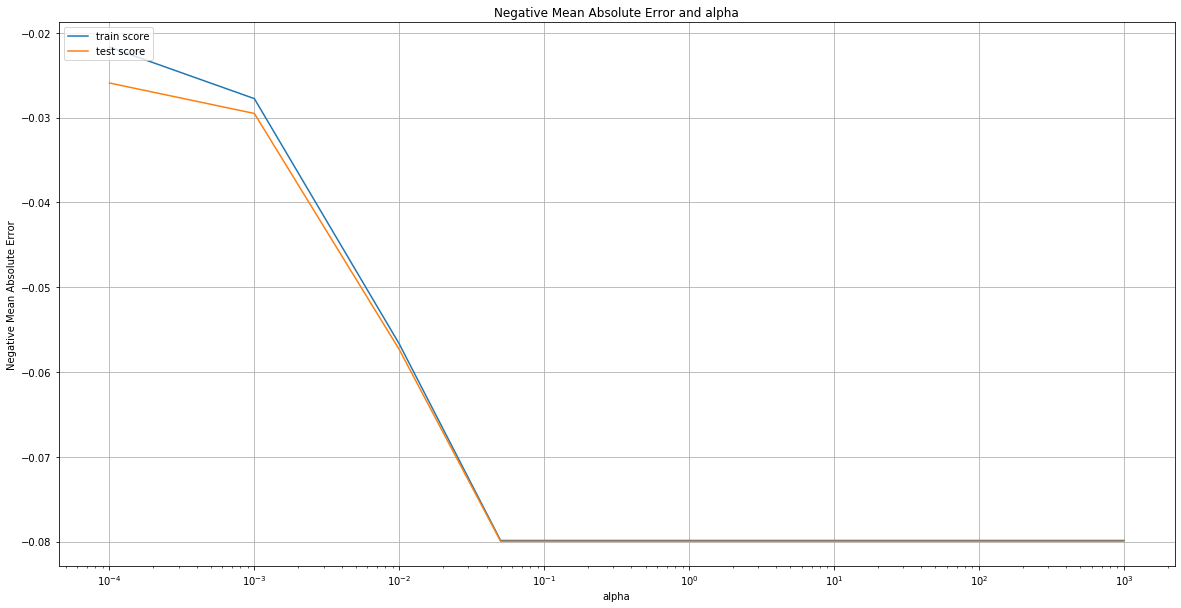

In [109]:
# plot
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')
plt.figure(figsize = (20,10))
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.xscale('log')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [110]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.0001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
train_score = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
y_test_pred = lm.predict(X_test)
test_score = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)


print('Train R2 score:',round(train_score,4))
print('Test R2 score:',round(test_score,4))

Train R2 score: 0.8855
Test R2 score: 0.8537


In [111]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.009),
 ('LotFrontage', -0.01),
 ('LotArea', 0.053),
 ('OverallQual', 0.13),
 ('OverallCond', 0.045),
 ('YearBuilt', 0.012),
 ('YearRemodAdd', 0.009),
 ('MasVnrArea', 0.026),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.01),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.063),
 ('LowQualFinSF', -0.015),
 ('GrLivArea', 0.264),
 ('BsmtFullBath', 0.035),
 ('BsmtHalfBath', 0.002),
 ('FullBath', 0.027),
 ('HalfBath', 0.007),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.034),
 ('TotRmsAbvGrd', 0.003),
 ('Fireplaces', 0.017),
 ('GarageYrBlt', 0.0),
 ('GarageCars', 0.062),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.016),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.008),
 ('ScreenPorch', 0.005),
 ('PoolArea', -0.0),
 ('MiscVal', -0.0),
 ('MoSold', -0.001),
 ('YrSold', -0.003),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', 0.006),
 ('MSSubClass_1-STORY 1945 & OLDER', 0.0),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', 0.009),
 ('MS

In [112]:
np.count_nonzero(lm.coef_)

114

In [113]:
lm.coef_

array([-1.03136083e-02,  5.34222204e-02,  1.29683992e-01,  4.49737665e-02,
        1.19675139e-02,  8.68925442e-03,  2.60787532e-02,  0.00000000e+00,
        0.00000000e+00,  1.04113834e-02,  0.00000000e+00,  0.00000000e+00,
        6.32210218e-02, -1.45849175e-02,  2.64375618e-01,  3.51366750e-02,
        1.99463362e-03,  2.73383790e-02,  6.62427409e-03, -0.00000000e+00,
       -3.37125328e-02,  3.23459246e-03,  1.71857685e-02,  0.00000000e+00,
        6.21277737e-02,  0.00000000e+00,  1.63181797e-02, -0.00000000e+00,
        0.00000000e+00,  8.49367224e-03,  5.49418673e-03, -0.00000000e+00,
       -0.00000000e+00, -1.41520526e-03, -3.15679554e-03,  6.16886683e-03,
        0.00000000e+00,  8.69843284e-03, -8.57198213e-03,  0.00000000e+00,
       -4.95135656e-03, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -8.15963781e-03, -1.37705812e-04, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  6.89049374e-03,
        0.00000000e+00,  

In [114]:
max(lm.coef_)

0.2643756176952568

### Using Lasso regularization we get a train accuracy of 88.5% and test accuracry of 85.4% but the number of `non-zero` columns /variables required to obtain this is `114` which is almost 43% less than ridge ,hence we will be using Lasso regularization to make final predictions

### Top 20 variables as predicted by Lasso are :
-  GrLivArea   
- OverallQual
- Neighborhood_NoRidge
- 2ndFlrSF
- GarageCars
- LotArea
- Neighborhood_NridgHt
- OverallCond
- BsmtQual_Gd
- Neighborhood_StoneBr
- KitchenQual_TA
- KitchenQual_Fa
- KitchenQual_Gd
- BsmtQual_TA
- BsmtFullBath
- KitchenAbvGr
- Neighborhood_Crawfor
- Neighborhood_Somerst
- BsmtQual_No Basement
- BsmtQual_Fa


## The above variables are the top 20 variables which contribute to the overall Flat rate and should be more focused while predicting the value of the house 